# Rita Lam Individual EDA

I will be analysing the state datasets together with Jamie.
The EDA will consists of three section, each follow by an observation section 

A. initial data exploration.

B. Data filteration and processing 

C. Analysis and visualisation

### A.  Dataset exploration

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [3]:
state_df = pf.load_and_process_many("../../data/raw/state")

In [4]:
state_df.head()

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7


In [5]:
# Overview of the dataset
state_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5647426.0,1972.391787,29.573899,1910.0,1949.0,1977.0,1999.0,2014.0
Count,5647426.0,52.923814,180.810001,5.0,7.0,13.0,34.0,10023.0


In [6]:
state_df.dtypes

Name      object
Year       int64
Gender    object
State     object
Count      int64
dtype: object

In [7]:
state_df.columns

Index(['Name', 'Year', 'Gender', 'State', 'Count'], dtype='object')

### Observation

From the initial oberservation, we can see that the datasets contains five variables. 
Without and filtration, there are more than 5.6 millions datapoints. 

For this reason, we separate the tasks: I will be analysing the western and mid_wester states. The states are care cateogrized in the scripts functinos already.
Jamie will be focus on the northern and southern states. 

### Research Question:

Compare the Western and Middle Western states of the US, What is the top5 most popular Name in **1910 and 2010** ? Is there any names that are still popular after 100 yeras? Is there a regional similarity in the naming in the 100 years?


## B. Data filtration and processing

In [8]:
# We cateogroize the midwestern states as following:
mw_df = state_df.loc[state_df["State"].isin(pf.MID_WEST)].reset_index(drop=True)
mw_df

,Name,Year,Gender,State,Count
0,Helen,1910,F,IA,249
1,Mary,1910,F,IA,239
2,Dorothy,1910,F,IA,185
3,Mildred,1910,F,IA,162
4,Ruth,1910,F,IA,155
...,...,...,...,...,...
1373684,Uriel,2014,M,WI,5
1373685,Vernon,2014,M,WI,5
1373686,Wilson,2014,M,WI,5
1373687,Zaire,2014,M,WI,5


In [9]:
# Cateogorize WESTERN states as following:
west_df = state_df.loc[state_df["State"].isin(pf.WEST)].reset_index(drop=True)
west_df

,Name,Year,Gender,State,Count
0,Mary,1910,F,AK,14
1,Annie,1910,F,AK,12
2,Anna,1910,F,AK,10
3,Margaret,1910,F,AK,8
4,Helen,1910,F,AK,7
...,...,...,...,...,...
1156146,Seth,2014,M,WY,5
1156147,Spencer,2014,M,WY,5
1156148,Tyce,2014,M,WY,5
1156149,Victor,2014,M,WY,5


In [10]:
west_df.describe(include=[object]).T

,count,unique,top,freq
Name,1156151,19497,Leslie,1577
Gender,1156151,2,F,647208
State,1156151,13,CA,354213


In [11]:
mw_df.describe(include=[object]).T

,count,unique,top,freq
Name,1373689,13773,Leslie,1791
Gender,1373689,2,F,772608
State,1373689,12,IL,214609


### Observation

For initial exploration, we can see that western states contains 12 states and 19497 Names being used. For middle western states there are 13 states and 13773 names being used. 
We do know the most popular name, Lesslie, but we still do not know the general trend of the naming. Therefore, additional analysis is needed for filtering data and visualisation.

### C1.1 Analysis and Visualisation

RQ1: What hat is the top5 most popular Name in western and mid_western states from **1910 and 2015**? Is there any similarity in naming over the hundred years? or any similarity between regions?

**C1.1 Time analysis**

In [12]:
# First let's take a look at the top 5 name in 1910 in both western & mid_wester states
west_1910 = (west_df[west_df["Year"] == 1910]
              .drop(columns=['Gender'])# We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              . drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True).iloc[:5])
west_1910

,Name,Year,State,Count
0,Mary,1910,CA,295
1,Helen,1910,CA,239
2,John,1910,CA,237
3,Dorothy,1910,CA,220
4,William,1910,CA,170


In [13]:
mw_1910 = (mw_df[mw_df["Year"] == 1910]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True).iloc[:5])
mw_1910

,Name,Year,State,Count
0,Mary,1910,OH,1099
1,Helen,1910,IL,917
2,John,1910,IL,644
3,Dorothy,1910,IL,553
4,Margaret,1910,IL,501


In [14]:
# Now let's see the top 5 name after 100 years (2010) in western states & mid_western states
west_2010 = (west_df[west_df["Year"] == 2010]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True)
              .iloc[:5]
            )
west_2010

,Name,Year,State,Count
0,Isabella,2010,CA,3364
1,Sophia,2010,CA,3357
2,Jacob,2010,CA,3347
3,Daniel,2010,CA,3131
4,Anthony,2010,CA,2858


In [15]:
mw_2010 = (mw_df[mw_df["Year"] == 2010]
              .drop(columns=['Gender']) # We are not looking at Gender yet
              .sort_values(by= ['Count'], ascending=False)
              .drop_duplicates(subset=["Name"]) 
              .reset_index(drop=True)
              .iloc[:5]
          )
mw_2010

,Name,Year,State,Count
0,Isabella,2010,IL,944
1,Sophia,2010,IL,918
2,Alexander,2010,IL,914
3,Jacob,2010,IL,911
4,Olivia,2010,IL,823


<AxesSubplot:xlabel='Name', ylabel='Count'>

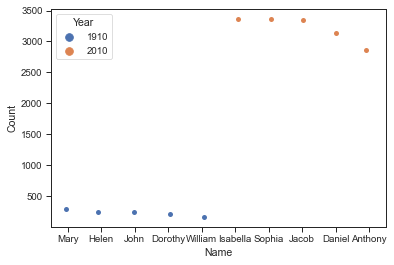

In [16]:
# In order to visualize the influence of time, I will focus on change of names in just western states over the 100 years
# I will combine the 1910 and 2010 western states dataset for comparison 
sns.set_theme(context="paper", style="ticks",  font_scale= 1.1)
west_time = pd.concat([west_1910, west_2010], axis=0)
sns.stripplot(x="Name",y='Count',data= west_time, hue='Year')

<AxesSubplot:xlabel='Name', ylabel='Count'>

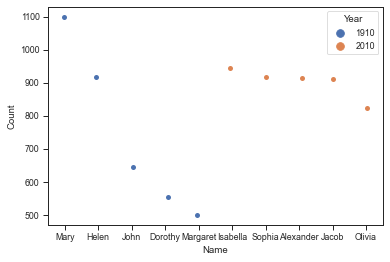

In [17]:
# Now let's take a look at mid_western states as well
sns.set_theme(context="paper", style="ticks",  font_scale= 1)
mw_time = pd.concat([mw_1910, mw_2010], axis=0)
sns.stripplot(x="Name",y='Count',data= mw_time, hue='Year')

**Observation**

We see that the top 5 names in western states changed completely in 100 years. 

The frequency of the name occur is much higher in 2010 in werstern states most likely because the popular growth,
However, in mid_wester states the popular did not have as significant increase as wester states

Now I want to take a closer look at the ***regional difference***

**C1.2 Regional differences**

In [21]:
# First we have to assign a new variable "Region", and combine the two regions datasets for analysis
new_mw_time=mw_time.assign(Region= "Mid_West")
new_west_time= west_time.assign(Region="Western")
region_time = pd.concat([new_mw_time, new_west_time], axis=0).reset_index(drop=True)
region_time

,Name,Year,State,Count,Region
0,Mary,1910,OH,1099,Mid_West
1,Helen,1910,IL,917,Mid_West
2,John,1910,IL,644,Mid_West
3,Dorothy,1910,IL,553,Mid_West
4,Margaret,1910,IL,501,Mid_West
5,Isabella,2010,IL,944,Mid_West
6,Sophia,2010,IL,918,Mid_West
7,Alexander,2010,IL,914,Mid_West
8,Jacob,2010,IL,911,Mid_West
9,Olivia,2010,IL,823,Mid_West


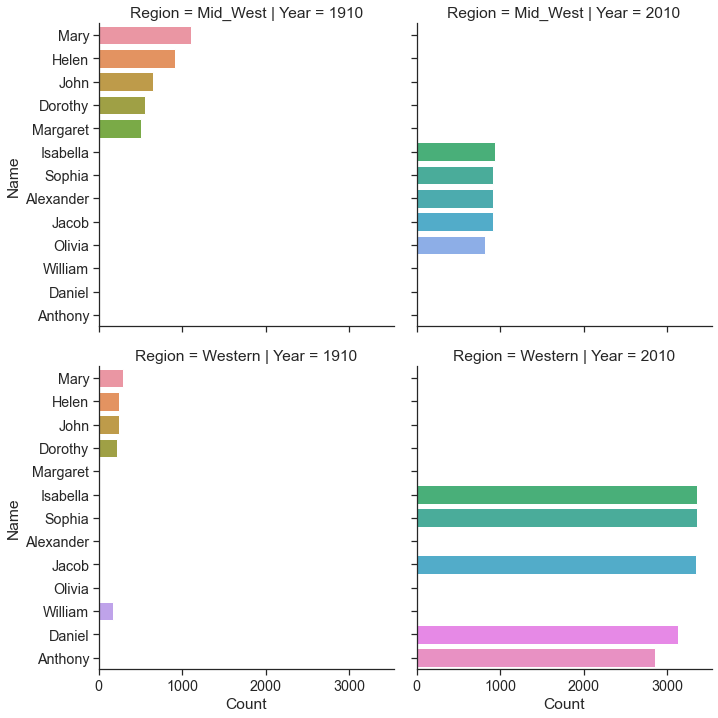

In [53]:
sns.set_theme(font_scale=1.3,style="ticks")
grid = sns.catplot(data=region_time,
            x="Count",
            y="Name",
            col="Year",
            row="Region",
            kind="bar",
            )
